In [55]:
import edsCopy1 as eds 
import simpy
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import show as sh

In [56]:
clear all

In [57]:
df=pd.read_csv('Prepro/Test-Data',index_col='Unnamed: 0')
sectors=df['PCI Serving'].unique()
cluster=[775,133]

In [58]:
sectors=df['PCI Serving'].unique()

In [72]:
cluster=[775,133]

In [99]:
max_prb=50
ue_nr=10


size=4000
env=simpy.Environment()
ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
ue_dict_red2,ue_all=eds.get_user_from_cluster(ue_dict,cluster)
prb_number_comp=20
prb_number_normal=max_prb-prb_number_comp


In [100]:
load1_l=np.array([])
load2_l=np.array([])
speicher={}
ran=np.arange(1,40,1)
metric=[1,1]
for k in ran:
    env=simpy.Environment()
    sched1=eds.sched_inst(env)
    sched2=eds.sched_inst(env)
    sched3=eds.sched_inst(env)
    sched_l=[sched1,sched2]
    

    ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
    ue_dict_red2,ue_all=eds.get_user_from_cluster(ue_dict,cluster)
    
    env=simpy.Environment()
    #Start processes

    SCHEDULE_T=2 #Clock des Schedulers 
    for i in cluster:
        ue_list=ue_dict_red2[i]
        for j in ue_list:
            env.process(j.best_effort_stat(env,k))

    ue_comp=np.array([]) #ues that use comp -> processed by central_scheduler
    for i in cluster:
        ue_list=ue_dict_red2[i]
        new_ue_list=np.array([])
        for j in ue_list:
            if(j.comp == 0):
                new_ue_list=np.append(new_ue_list,j)
            else:
                ue_comp=np.append(ue_comp,j)
        ue_dict[i]=new_ue_list #user without comp

    env.process(sched3.central_scheduler(env,ue_comp,SCHEDULE_T,cluster,prb_number_comp,metric))

    counter=0
    for i in cluster:
        ue_list=ue_dict[i]
        ue_sep=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
        sched=sched_l[counter]
        env.process(sched.scheduler(env,ue_sep,SCHEDULE_T,cluster,max_prb,ue_list,prb_number_normal,metric))
        counter=counter+1
    timer=1000
    env.run(until=timer)
    liste=np.array([])
    
    av=0
    for i in ue_all:
        liste=np.append(liste,((i.mR2/i.mR)-1)*100)
        av+=i.mR2/i.mR
    av=av/(ue_nr*2)
    speicher.update({k:liste})
    
    rem1=0
    req1=0
    load1=0
    rem2=0
    req2=0
    load2=0
    ind=int(timer/2-2)
    for i in np.arange(100,ind):
        rem1+=sched1.rem_prb[ind]
        req1+=sched1.rem_req[ind]
        load1+=(sched1.rem_req[ind]+(max_prb-sched1.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
        rem2+=sched2.rem_prb[ind]
        req2+=sched2.rem_req[ind]
        load2+=(sched2.rem_req[ind]+(max_prb-sched2.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)
        
    load1_l=np.append(load1_l,load1/len(np.arange(100,ind)))
    load2_l=np.append(load2_l,load2/len(np.arange(100,ind)))
    
    

C:\Users\Caroline Zoll\EDS\edsCopy1.py:210: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\edsCopy1.py:240: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


In [101]:
sched.rem_prb

{2: 0.0,
 4: 0.0,
 6: 0.0,
 8: 0.0,
 10: 0.0,
 12: 0.0,
 14: 0.0,
 16: 0.0,
 18: 0.0,
 20: 0.0,
 22: 0.0,
 24: 0.0,
 26: 0.0,
 28: 0.0,
 30: 0.0,
 32: 0.0,
 34: 0.0,
 36: 0.0,
 38: 0.0,
 40: 0.0,
 42: 0.0,
 44: 0.0,
 46: 0.0,
 48: 0.0,
 50: 0.0,
 52: 0.0,
 54: 0.0,
 56: 0.0,
 58: 30.0,
 60: 50,
 62: 0.0,
 64: 0.0,
 66: 0.0,
 68: 0.0,
 70: 0.0,
 72: 15.0,
 74: 50,
 76: 50,
 78: 0.0,
 80: 0.0,
 82: 0.0,
 84: 0.0,
 86: 0.0,
 88: 0.0,
 90: 0.0,
 92: 0.0,
 94: 0.0,
 96: 0.0,
 98: 0.0,
 100: 0.0,
 102: 28.0,
 104: 0.0,
 106: 0.0,
 108: 0.0,
 110: 0.0,
 112: 0.0,
 114: 34.0,
 116: 0.0,
 118: 20.0,
 120: 0.0,
 122: 20.0,
 124: 50,
 126: 0.0,
 128: 27.0,
 130: 50,
 132: 50,
 134: 50,
 136: 50,
 138: 0.0,
 140: 0.0,
 142: 0.0,
 144: 0.0,
 146: 0.0,
 148: 0.0,
 150: 0.0,
 152: 42.0,
 154: 50,
 156: 0.0,
 158: 0.0,
 160: 25.0,
 162: 0.0,
 164: 0.0,
 166: 0.0,
 168: 0.0,
 170: 0.0,
 172: 0.0,
 174: 25.0,
 176: 10.0,
 178: 50,
 180: 10.0,
 182: 0.0,
 184: 0.0,
 186: 24.0,
 188: 50,
 190: 0.0,
 192: 

In [102]:
l=np.array([])
l2=np.array([])
for i in ran:
    x=speicher.get(i)
    m=x[0:ue_nr].mean()
    m2=x[ue_nr:ue_nr*2].mean()
    l=np.append(l,m)
    l2=np.append(l2,m2)
min_val=min(np.append(load1_l,load2_l))
max_val=max(np.append(load1_l,load2_l))

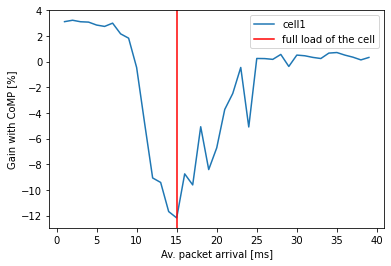

In [103]:
plt.plot(ran,l,label='cell1')
plt.axvline(x=ran[14], color='red', label='full load of the cell')
plt.xlabel('Av. packet arrival [ms]')
plt.ylabel('Gain with CoMP [%]')
plt.legend(loc='upper right')


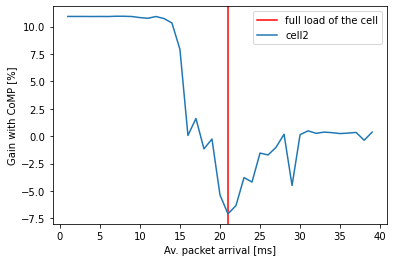

In [104]:
plt.axvline(x=ran[20], color='red', label='full load of the cell')
plt.plot(ran,l2,label='cell2')
#plt.plot(ran,(l2+l)/2,label='av')
plt.xlabel('Av. packet arrival [ms]')
plt.ylabel('Gain with CoMP [%]')
plt.legend(loc='upper right')


In [ ]:
l_saver={}
l2_saver={}
prb=[30,31,32]
for prb_number_comp in prb:
    
    prb_number_normal=max_prb-prb_number_comp

    load1_l=np.array([])
    load2_l=np.array([])
    speicher={}
    ran=np.arange(1,40,1)
    metric=[1,1]
    for k in ran:
        env=simpy.Environment()
        sched1=eds.sched_inst(env)
        sched2=eds.sched_inst(env)
        sched3=eds.sched_inst(env)
        sched_l=[sched1,sched2]


        ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
        ue_dict_red2,ue_all=eds.get_user_from_cluster(ue_dict,cluster)

        env=simpy.Environment()
        #Start processes

        SCHEDULE_T=2 #Clock des Schedulers 
        for i in cluster:
            ue_list=ue_dict_red2[i]
            for j in ue_list:
                env.process(j.best_effort_stat(env,k))

        ue_comp=np.array([]) #ues that use comp -> processed by central_scheduler
        for i in cluster:
            ue_list=ue_dict_red2[i]
            new_ue_list=np.array([])
            for j in ue_list:
                if(j.comp == 0):
                    new_ue_list=np.append(new_ue_list,j)
                else:
                    ue_comp=np.append(ue_comp,j)
            ue_dict[i]=new_ue_list #user without comp

        env.process(sched3.central_scheduler(env,ue_comp,SCHEDULE_T,cluster,prb_number_comp,metric))

        counter=0
        for i in cluster:
            ue_list=ue_dict[i]
            ue_sep=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
            sched=sched_l[counter]
            env.process(sched.scheduler(env,ue_sep,SCHEDULE_T,cluster,max_prb,ue_list,prb_number_normal,metric))
            counter=counter+1
        timer=1000
        env.run(until=timer)
        liste=np.array([])

        av=0
        for i in ue_all:
            liste=np.append(liste,((i.mR2/i.mR)-1)*100)
            av+=i.mR2/i.mR
        av=av/(ue_nr*2)
        speicher.update({k:liste})

        rem1=0
        req1=0
        load1=0
        rem2=0
        req2=0
        load2=0
        ind=int(timer/2-2)
        for i in np.arange(100,ind):
            rem1+=sched1.rem_prb[ind]
            req1+=sched1.rem_req[ind]
            load1+=(sched1.rem_req[ind]+(max_prb-sched1.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)

            rem2+=sched2.rem_prb[ind]
            req2+=sched2.rem_req[ind]
            load2+=(sched2.rem_req[ind]+(max_prb-sched2.rem_prb[ind])*(timer/2))/((max_prb)*timer/2)

        load1_l=np.append(load1_l,load1/len(np.arange(100,ind)))
        load2_l=np.append(load2_l,load2/len(np.arange(100,ind)))

    l=np.array([])
    l2=np.array([])
    for i in ran:
        x=speicher.get(i)
        m=x[0:ue_nr].mean()
        m2=x[ue_nr:ue_nr*2].mean()
        l=np.append(l,m)
        l2=np.append(l2,m2)
    min_val=min(np.append(load1_l,load2_l))
    max_val=max(np.append(load1_l,load2_l))
    l_saver.update({prb_number_comp:l})
    l2_saver.update({prb_number_comp:l2})

C:\Users\Caroline Zoll\EDS\edsCopy1.py:210: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\edsCopy1.py:240: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


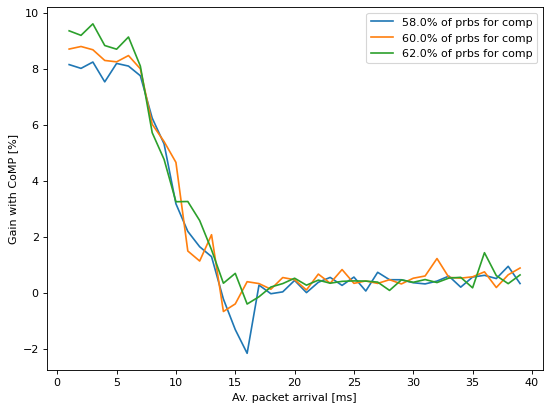

In [120]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
for i in prb:
    plt.plot(ran,l_saver[i],label=str(i*100/max_prb)+'% of prbs for comp')
#plt.axvline(x=ran[14], color='red', label='full load of the cell')
plt.xlabel('Av. packet arrival [ms]')
plt.ylabel('Gain with CoMP [%]')
plt.legend(loc='upper right')
